# Assignment 3 - ROS

*15 points*

## Create a train of turtles

by following and adapting to the TF2 tutorial 

https://docs.ros.org/en/jazzy/Tutorials/Intermediate/Tf2/Introduction-To-Tf2.html

The solution should look something like this example, with at least 3 turtles:

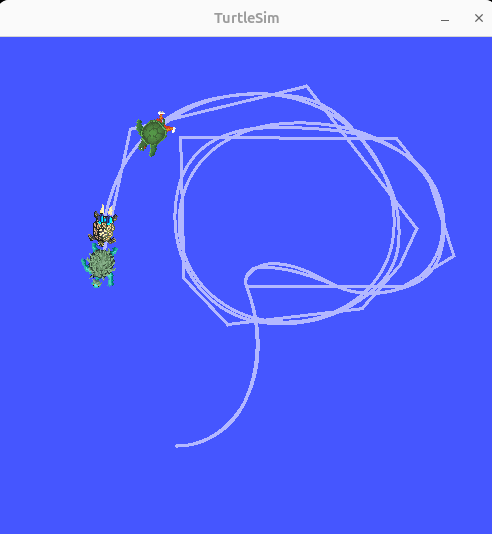

Find the 2-turtle demo here: `ros2 launch turtle_tf2_py turtle_tf2_demo.launch.py`


In this assignment you will launch a turtle party of at least 3 turtles, where each turtle follows it's predecessor.: 
* `turtle1` leads and can be controlled with your keys
* `turtle2` follows `turtle1`
* `turtle3` follows `turtle2`
* ...
* `turtleN` follows `turtleN-1`

In Task 1 you create a workspace with a python ROS package inside.

In Task 2 will provide a node to command a turtle to follow another.

In Task 3 you create a launchfile. 

### Task 1 - ROS package

Create a ROS workspace. In the `src` folder, create a ROS package called `turtle_party` with a node `follow`.


### Task 2 - Turtle chasing

You will need the code from the listener tutorial: 

https://docs.ros.org/en/jazzy/Tutorials/Intermediate/Tf2/Writing-A-Tf2-Listener-Py.html

The example Python script includes
* spawning turtle2 by calling the ROS service
* listening to the transformation between turtle1 and turtle2
* calculate and send velocity commands to turtle2, to follow turtle1.

Use this example script from the tutorial and adapt it, such that 'turtle2' can be replaced by a ROS parameter, which will be provided when when starting the node.

Given that the turtle1 and turtle2 are spawned and both have a TF broadcaster, the `follow` node can be started with

`ros2 run turtle_party follow --ros-args -p target_frame:=turtle1 -p turtle_name:=turtle2`



### Task 3: Launchfile

Create a directory `launch` and within the launchfile `turtles_gone_wild.launch` that starts all required files and ROS commands with

`ros2 launch turtle_party turtles_gone_wild.launch`.

You need to
* start the simulation
* broadcast each turtles pose to TF
* spawn additional turtles and make them move (Task 2)

To make launchfiles executable, add them in the `setup.py`. Assuming your launchfile is named `turtles_gone_wild.launch`
```python
...
    data_files=[
        ('share/ament_index/resource_index/packages',
            ['resource/' + package_name]),
        ('share/' + package_name, ['package.xml', 'launch/turtles_gone_wild.launch']),
    ],
...
```

## Hints

This assignment is best done on your local machine instead of in the binder.

Work through the beginner tutorials: https://docs.ros.org/en/jazzy/Tutorials.html

Find especially the material on the TF2 library: https://docs.ros.org/en/jazzy/Tutorials/Intermediate/Tf2/Tf2-Main.html

Use `rqt` to call services like 'spawn' and 'kill'.
```
rqt
```

Use `rqt_graph` to visualize the topic network
```bash
rqt_graph
```

## Solution

After you have finished this assignment, zip your `turtle_party` package as `turtle_party.zip` and push it to your git repo as the solution.

To grade your work I will unzip the package in a fresh `ros_ws/src` and do

```
rosdep install -i --from-paths src --rosdistro jazzy
colcon build
source install setup.bash
ros2 launch turtle_party turtles_gone_wild.launch
```